In [36]:
from pathlib import Path
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import rasterio as rio

In [8]:
sys.path.append("/home/nilscp/GIT/crater_morphometry/rim_detection")
sys.path.append("/home/nilscp/GIT/crater_morphometry/preprocessing")
sys.path.append("/home/nilscp/GIT/crater_morphometry")

In [25]:
dem = Path('/home/nilscp/GIT/crater_morphometry/data/crater_dem/crater0096.asc')

In [23]:
import DEM_extraction

In [26]:
(ncols, nrows, xllcorner, yllcorner, cellsize, NODATA_value) = DEM_extraction.readheader(str(dem))
(ncols, nrows, xllcorner, yllcorner, cellsize, NODATA_value)

(322, 321, 528.15570779356, 1256583.0584676, 59.2252938, -9999.0)

In [27]:
data = pd.read_csv(str(dem), delimiter=' ', skiprows=6).values

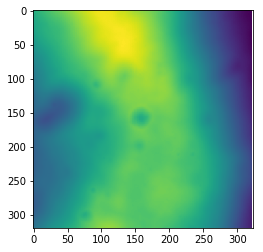

In [28]:
plt.imshow(data)

I think I would like to go away from using ascii dem as raster format. I will try to do the same with .tif, which I think will make the program much easier to run. 

In [52]:
dem2 = Path('/home/nilscp/tmp/crater0096.tif')

with rio.open(dem2) as src:
    array = reshape_as_image(src.read())
    meta = src.profile

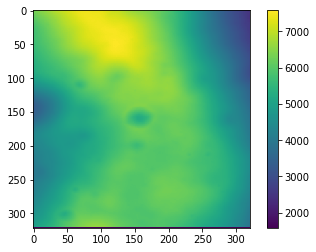

In [54]:
plt.imshow(array[:,:,0], vmin=np.nanmin(data), vmax=np.nanmax(data))
plt.colorbar()

In [49]:
np.shape(array[:,:,0]), np.shape(data)

((322, 321), (320, 323))

In [50]:
np.nanmin(data), np.min(array), np.nanmax(data), np.max(array)

(1580.0, -32768, 7577.0, 7577)

In [53]:
meta

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 321, 'height': 322, 'count': 1, 'crs': CRS.from_wkt('PROJCS["Equirectangular Moon",GEOGCS["GCS_Moon",DATUM["D_Moon",SPHEROID["Moon_localRadius",1737400,0]],PRIMEM["Reference_Meridian",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Equirectangular"],PARAMETER["standard_parallel_1",0],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(59.2252938, 0.0, -3756068.132535,
       0.0, -59.2252938, 1275594.3777774), 'tiled': False, 'interleave': 'band'}

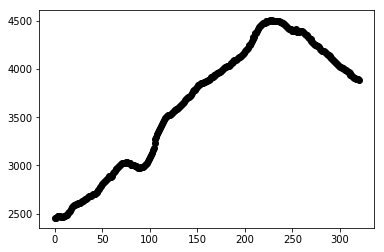

In [63]:
plt.plot(array[:-1,-1,0],"ko")

In [57]:
data2 = np.rot90(data)
data3 = np.rot90(data2)
data4 = (np.rot90(data3)) #scaling factor # only for sldem

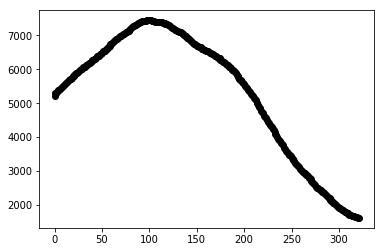

In [60]:
plt.plot(data[0,:],"ko")